# Análise Estatística de Dados e Informações
**PPCA/UNB**

---

**Tarefa 02**  
**Professor**: João Gabriel de Moraes Sousa  
**Aluna**: Andreia Queiroz Correia Dummar  
**Matrícula**: 241134680  
**Data da Entrega**: 17/11/2024  
**Github**: https://github.com/aqcorreia/AEDI/tree/bb68c12f3e69d6cafe3fd7d6864e38b4c0721182/Tarefa02

---

**Aplicação**: Análise de carteiras de investimento 

**Dados**: Yahoo finance

**Filtros**: 
- Ações: 'ABEV3.SA', 'BBAS3.SA', 'ITUB4.SA', 'WEGE3.SA', 'VALE3.SA'
- Índice: '^BVSP'
- Período analisado: de 01/01/2010 a 12/11/2024

## Questão 

Você é um analista financeiro de uma grande corretora de investimentos. Essa corretora pede que você adquira os dados de 5 ações da bolsa de valores de São Paulo (B3) e o índice que a compõe. As cinco ações escolhidas ficarão a seu critério. Com isso, a corretora pede:

### a) Escolha cinco ações para análise: 

Você deve selecionar cinco ações de sua preferência e obter dados **históricos de preços dessas ações**, além do índice que as compõe.

- Açoes escolhidas: 'ABEV3.SA', 'BBAS3.SA', 'ITUB4.SA', 'WEGE3.SA', 'VALE3.SA'
- Índice:  '^BVSP'

---

 - Para a análise deste trabalho, foram utilizadas as colunas **Adj Close** e **Volume** retornadas na consulta do yahoo finance
 - Abaixo um quadro explicativo do que contém cada coluna:
   

| **Aspecto**              | **`Adj Close`**                        | **`Volume`**                       |
|---------------------------|----------------------------------------|-------------------------------------|
| **Definição**             | Preço de fechamento ajustado          | Número total de ações negociadas   |
| **Unidade**               | Valor monetário (ex.: R$, US)        | Número de ações (inteiro)          |
| **Impacto de Eventos**    | Ajustado por dividendos e splits      | Não é afetado por eventos          |
| **Usado para**            | Retornos históricos, análise de preço | Medir liquidez, volume de mercado  |

---

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os

In [2]:
# Caminho do diretório e nome do arquivo
diretorio = './dados'
arquivo_excel = os.path.join(diretorio, 'historico_acoes_indice.xlsx')

# Criar o diretório caso não exista
os.makedirs(diretorio, exist_ok=True)

# Verificar se o arquivo já existe
if os.path.exists(arquivo_excel):
    # Carregar os dados do arquivo Excel
    dfHistoricoAcoesIndice = pd.read_excel(arquivo_excel, parse_dates=['data'])
    print("Dados carregados do arquivo Excel existente.")
else:
    # Configurar tickers e baixar dados históricos
    tickers = ['ABEV3.SA', 'BBAS3.SA', 'ITUB4.SA', 'WEGE3.SA', 'VALE3.SA', '^BVSP']
    dados = yf.download(tickers, start='2010-01-01', end='2024-11-12')[['Adj Close', 'Volume']]

    # Resetar o índice e remover o MultiIndex das colunas
    dados = dados.reset_index()
    dados.columns = ['Date'] + [f"{metric}_{ticker}" for metric, ticker in dados.columns[1:]]

    # Transformar o DataFrame em formato longo para 'Adj Close' e 'Volume'
    dfHistoricoAcoesIndice = pd.wide_to_long(
        dados,
        stubnames=['Adj Close', 'Volume'],
        i='Date',
        j='Ticker',
        sep='_',
        suffix='.+'
    ).reset_index()

    # Renomear colunas finais
    dfHistoricoAcoesIndice.columns = ['data', 'ticker', 'Adj Close', 'Volume']

    # Remover timezone das colunas datetime
    dfHistoricoAcoesIndice['data'] = dfHistoricoAcoesIndice['data'].dt.tz_localize(None)

    # Adicionar a coluna do total financeiro movimentado (tratando valores nulos)
    dfHistoricoAcoesIndice['Total Movimentado'] = (
        dfHistoricoAcoesIndice['Adj Close'].fillna(0) * dfHistoricoAcoesIndice['Volume'].fillna(0)
    )

    # Salvar o DataFrame no arquivo Excel usando xlsxwriter como engine
    dfHistoricoAcoesIndice.to_excel(arquivo_excel, index=False, engine='xlsxwriter')
    print("Dados baixados e salvos no arquivo Excel.")

# Exibir o DataFrame resultante
print(dfHistoricoAcoesIndice.head())


Dados carregados do arquivo Excel existente.
        data    ticker  Adj Close     Volume  Total Movimentado
0 2010-01-04  ABEV3.SA   3.642293   818417.0       2.980915e+06
1 2010-01-05  ABEV3.SA   3.663717  1604298.0       5.877694e+06
2 2010-01-06  ABEV3.SA   3.701093   508069.0       1.880411e+06
3 2010-01-07  ABEV3.SA   3.718471  2690516.0       1.000461e+07
4 2010-01-08  ABEV3.SA   3.711328   588159.0       2.182851e+06


In [3]:
tickers = dfHistoricoAcoesIndice['ticker'].unique()
print(tickers)

['ABEV3.SA' 'BBAS3.SA' 'ITUB4.SA' 'VALE3.SA' 'WEGE3.SA' '^BVSP']


---

Gerado um dataframe com a mediana do valor das ações por ano, permitindo assim um comparativo entre elas

---

In [4]:
# Criar a coluna 'ano'
dfHistoricoAcoesIndice['ano'] = pd.to_datetime(dfHistoricoAcoesIndice['data']).dt.year

# Calcular a mediana do preço ajustado por ano e por ticker
dfMedianaPrecoPorAno = dfHistoricoAcoesIndice.groupby(['ticker', 'ano'])['Adj Close'].median().reset_index()

# Pivotar os dados para ter os anos como colunas
dfMedianaPrecoPorAno = dfMedianaPrecoPorAno.pivot(index='ticker', columns='ano', values='Adj Close').reset_index()

# Exibir o DataFrame resultante
dfMedianaPrecoPorAno.head(6)


ano,ticker,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,ABEV3.SA,3.814709,5.144720,7.989315,11.008535,10.877244,13.799526,14.152390,14.734967,15.407388,14.849998,11.537430,13.988517,13.437588,13.499389,12.590000
1,BBAS3.SA,5.695765,5.537870,5.151823,6.007034,6.555569,5.992409,6.413218,10.049016,11.683319,17.174414,12.369553,12.064549,14.805247,21.983853,26.607518
2,ITUB4.SA,10.048753,9.389308,8.962781,9.918887,12.192169,12.414454,14.298159,19.733495,24.566883,28.546127,21.437042,23.664803,22.291326,25.117759,33.066685
3,VALE3.SA,22.511267,22.101027,18.883291,17.585392,15.583335,10.460952,9.992450,18.628578,31.457855,31.183846,36.426474,68.227669,66.614212,63.279078,60.558714
4,WEGE3.SA,2.006792,2.148193,2.340271,3.345194,4.387831,5.306270,4.985825,6.571010,8.128523,10.010922,24.796538,34.344563,29.408141,36.644260,39.347944
5,^BVSP,67815.000000,61194.000000,59199.000000,53961.500000,52631.500000,49089.500000,53631.000000,66278.000000,83118.000000,99987.500000,100369.000000,117904.000000,110375.500000,114879.500000,128273.500000


---

Análise do comportamento em 2020, na qual se observou um crescimento significativo

---

In [5]:
# Criar a coluna 'mes'
dfHistoricoAcoesIndice['mes'] = pd.to_datetime(dfHistoricoAcoesIndice['data']).dt.month

# Filtrar os dados para o ano de 2020
df2020 = dfHistoricoAcoesIndice[dfHistoricoAcoesIndice['ano'] == 2020]

# Calcular a mediana mensal do preço ajustado por ticker
dfMedianaMensal2020 = df2020.groupby(['ticker', 'mes'])['Adj Close'].median().reset_index()

# Pivotar os dados para ter os meses como colunas
dfMedianaMensal2020Pivot = dfMedianaMensal2020.pivot(index='ticker', columns='mes', values='Adj Close').reset_index()

# Renomear as colunas para maior clareza
dfMedianaMensal2020Pivot.columns.name = None  # Remover o nome das colunas pivotadas
dfMedianaMensal2020Pivot.rename(columns=lambda x: f'Mês {x}' if isinstance(x, int) else x, inplace=True)

# Exibir o DataFrame resultante
dfMedianaMensal2020Pivot.head(5)


,ticker,Mês 1,Mês 2,Mês 3,Mês 4,Mês 5,Mês 6,Mês 7,Mês 8,Mês 9,Mês 10,Mês 11,Mês 12
0,ABEV3.SA,15.846590,13.904729,10.547544,9.839881,10.058919,11.659586,12.131360,11.019320,10.614942,11.272056,12.316701,13.163369
1,BBAS3.SA,18.186154,17.881999,11.335221,10.621033,10.048212,12.300936,12.613050,12.227496,11.944578,11.589863,12.754829,14.438993
2,ITUB4.SA,28.156324,27.318789,19.970385,18.834608,18.578259,21.912876,22.414328,20.297651,19.657307,19.761871,23.909092,26.026154
3,VALE3.SA,34.919888,33.701033,26.627179,28.133772,31.699793,35.673180,38.304859,39.843784,39.596226,41.731651,43.732342,57.211765
4,WEGE3.SA,16.947202,20.680538,16.727614,18.177402,17.865897,21.454065,25.755209,31.750412,30.097139,37.195179,37.970566,34.212723


In [6]:
# Especificar manualmente as cores para cada ticker
color_map = {
    'ABEV3.SA': '#90EE90',  # Verde claro
    'BBAS3.SA': '#FFD700',  # Amarelo suave
    'ITUB4.SA': '#FF8C00',  # Laranja médio
    'WEGE3.SA': '#006400',  # Verde escuro
    'VALE3.SA': '#8B0000',  # Vermelho escuro
    '^BVSP': '#4682B4'      # Azul
}

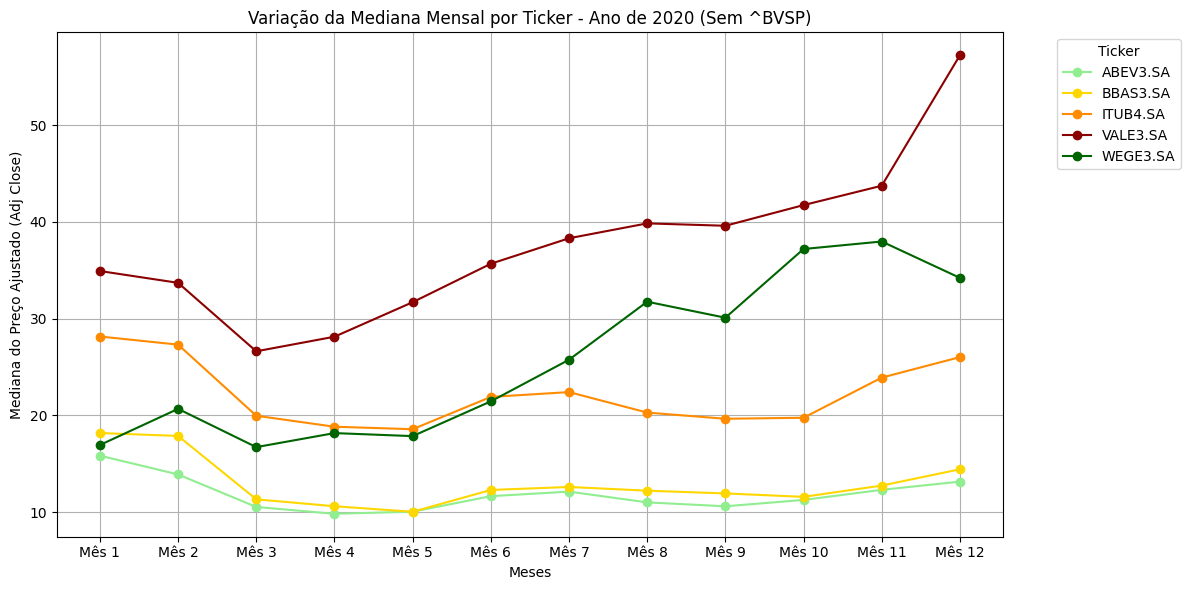

In [7]:
# Filtrar para excluir o índice ^BVSP
dfMedianaMensal2020Pivot = dfMedianaMensal2020Pivot[dfMedianaMensal2020Pivot['ticker'] != '^BVSP']

# Plotar a variação da mediana mensal para o ano de 2020
plt.figure(figsize=(12, 6))

# Iterar sobre cada ticker e plotar sua linha com a cor correspondente
for index, row in dfMedianaMensal2020Pivot.iterrows():
    ticker = row['ticker']
    mediana_mensal = row[1:]  # Valores das colunas "Mês 1" a "Mês 12"
    plt.plot(mediana_mensal, marker='o', label=ticker, color=color_map[ticker])

# Personalizar o gráfico
plt.title('Variação da Mediana Mensal por Ticker - Ano de 2020 (Sem ^BVSP)')
plt.xlabel('Meses')
plt.ylabel('Mediana do Preço Ajustado (Adj Close)')
plt.xticks(ticks=range(12), labels=[f'Mês {i+1}' for i in range(12)])
plt.legend(title='Ticker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Exibir o gráfico
plt.show()


---

### b) Realize uma análise gráfica descritiva temporal do preço das ações


Você deve plotar os dados de preços das ações ao longo do tempo para cada uma das ações selecionadas e para o índice. Visualize como o preço das ações mudou ao longo do tempo e identifique possíveis tendências.

---

**Análise**

- Foi plotado um **gráfico de linha** para cada ação e para o índice, individualmente.
- Para facilitar a análise do conjunto, foi posteriormente plotado um **gráfico com todas as ações**.
- Os valores das ações e do índice apresentam uma **tendência de crescimento** a partir do **1º semestre de 2020**.
- É possível observar que a ação com maior volume negociado, **VALE3.SA**, apresenta um gráfico mais similar ao do índice **^BVSP**. Entretanto, em **2024**, a **VALE3.SA** demonstra uma **tendência de queda**, enquanto o índice apresenta uma **tendência de crescimento**.
- A ação **ABEV3.SA** apresenta um comportamento mais distinto das demais e também o **menor valor das ações**.
- As ações **BBAS3.SA** e **ITUB4.SA**, na análise dos gráficos, apresentam um comportamento similar ao longo do tempo, apesar de o valor das ações da **BBAS3.SA** ser inferior ao da **ITUB4.SA**.
- A ação **WEGE3.SA** apresenta **pouca variação até 2020**, mas demonstra um **crescimento elevado em 2024**. No gráfico que reúne todas as ações, é possível observar que a **WEGE3.SA** é a que apresenta a **maior valorização em 2024**.

  
---

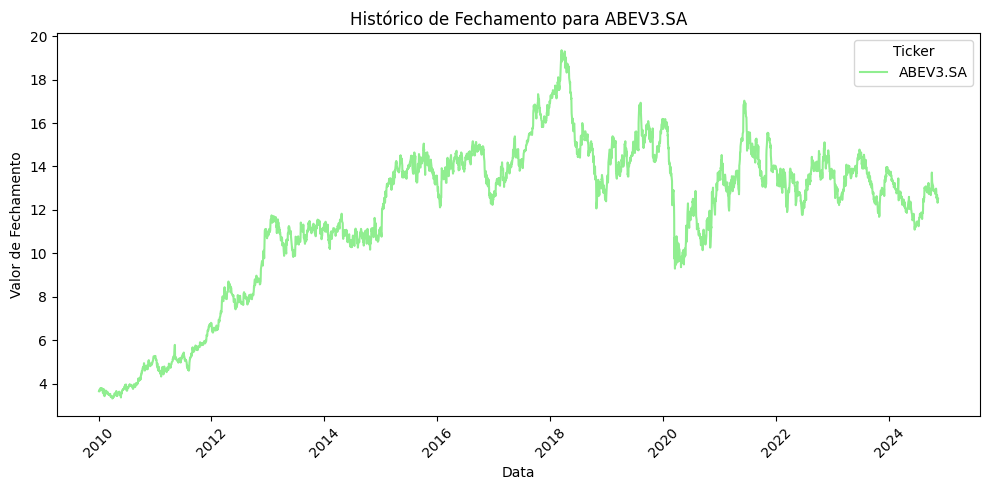

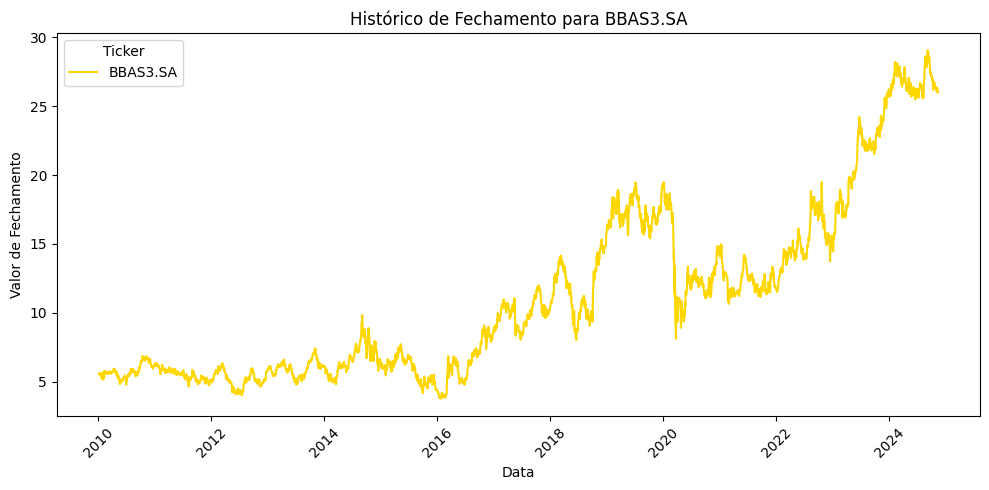

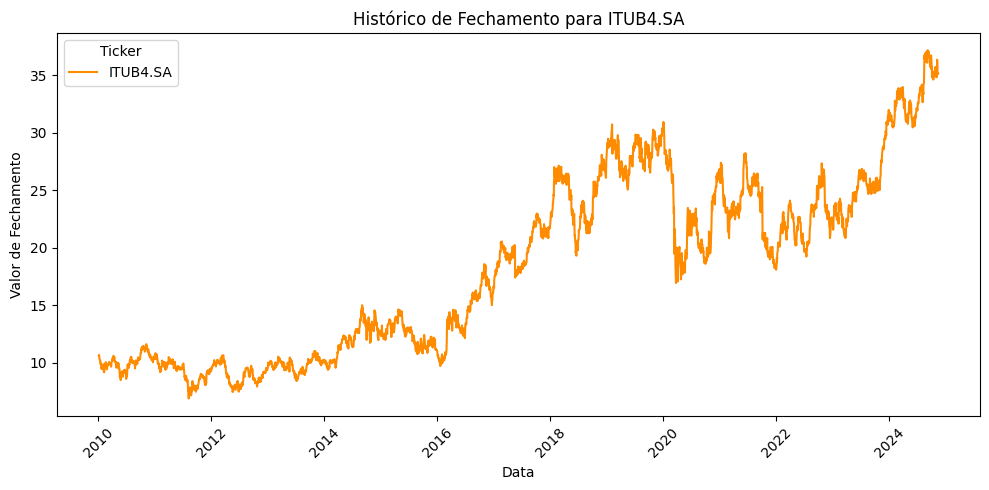

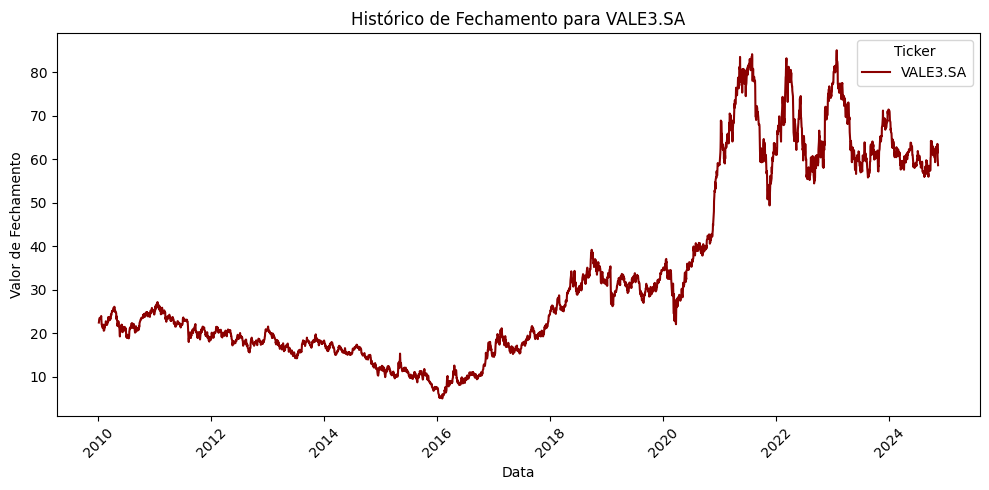

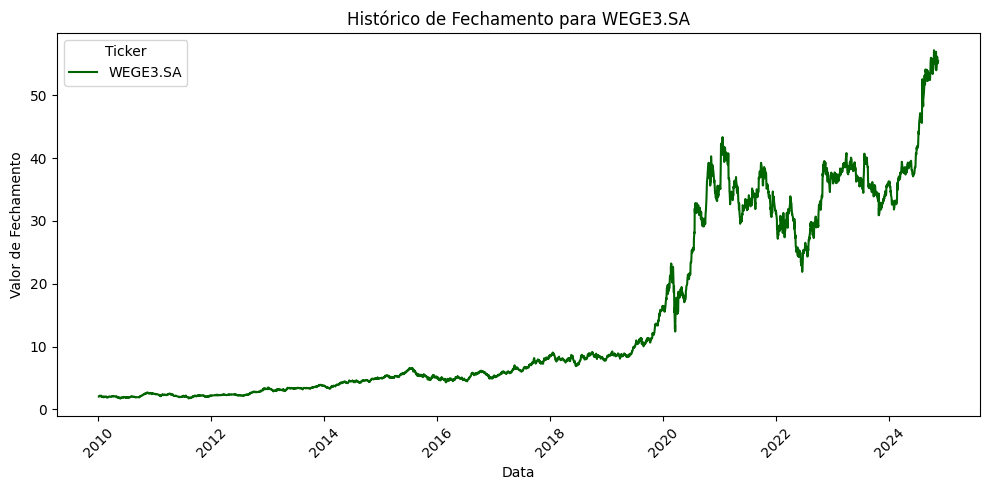

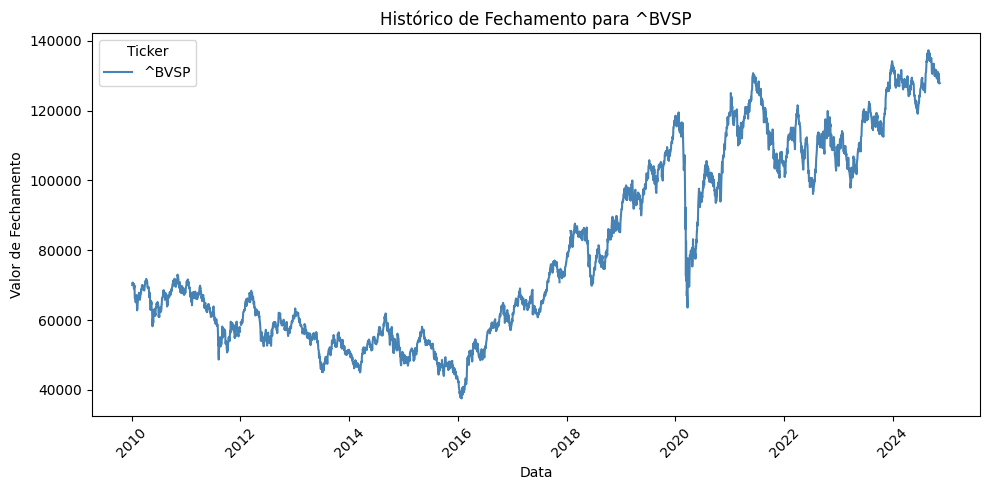

In [8]:
# Converte a coluna 'data' para o formato datetime, se necessário
dfHistoricoAcoesIndice['data'] = pd.to_datetime(dfHistoricoAcoesIndice['data'])

# Iterar por cada ticker, atribuindo a cor do color_map
for ticker, data in dfHistoricoAcoesIndice.groupby('ticker'):
    plt.figure(figsize=(10, 5))
    plt.plot(data['data'], data['Adj Close'], label=ticker, color=color_map[ticker])
    
    # Personalizar o gráfico
    plt.title(f'Histórico de Fechamento para {ticker}')
    plt.xlabel('Data')
    plt.ylabel('Valor de Fechamento')
    plt.legend(title='Ticker')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Exibir o gráfico
    plt.show()


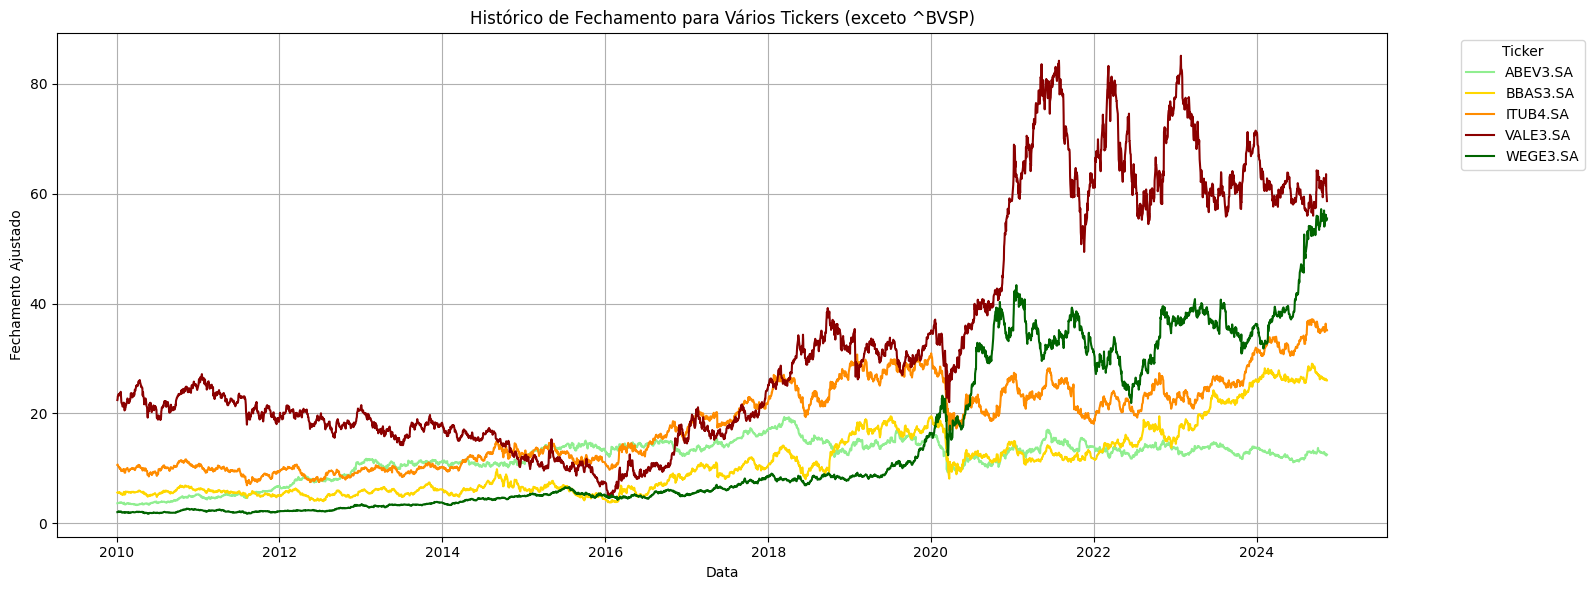

In [9]:
# Criar o gráfico com maior largura
plt.figure(figsize=(16, 6))  # Aumentar a largura para 16 e altura para 6

for ticker, data in dfHistoricoAcoesIndice.groupby('ticker'):
    if ticker != '^BVSP':  # Excluir o índice, se necessário
        plt.plot(data['data'], data['Adj Close'], label=ticker, color=color_map[ticker])

# Personalizar o gráfico das ações
plt.title('Histórico de Fechamento para Vários Tickers (exceto ^BVSP)')
plt.xlabel('Data')
plt.ylabel('Fechamento Ajustado')
plt.legend(title="Ticker", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Exibir o gráfico
plt.show()



---

### c) Realize uma análise gráfica descritiva temporal do retorno das ações: 

Você deve calcular os **retornos diários** das ações e do índice, e plotar os dados de retorno ao longo do tempo para cada uma das ações e para o índice. Visualize como o retorno das ações variou ao longo do tempo e identifique possíveis padrões.


- O retorno diário é calculado pela fórmula: Rt = [(Pt - Pt-1) / Ptj-1] * 100
  - Sendo:
  - Rt = Retorno diário no dia
  - Pt = Preço ajustado de fechamento no dia t (adj close)
  - Pt-1 = Preço ajustado de fechamento no dia anterior

**Características**

1. **Volatilidade**:
   - Retornos diários capturam as flutuações de curto prazo de um ativo, sendo úteis para medir a volatilidade.

2. **Sinal de direção**:
   - Retornos positivos indicam ganho no valor do ativo.
   - Retornos negativos indicam perda no valor do ativo.

3. **Aplicação**:
   - Eles são usados para modelar movimentos de preços, calcular métricas de risco como o desvio padrão e criar estratégias de negociação baseadas em algoritmos.


---

**Análise**: quanto ao retorno diário:

- Todas as ações e o índice apresentaram picos de variação (positivos e negativos) no **1º semestre de 2020**.
- A **ABEV3.SA** registrou a maior variação negativa no **1º semestre de 2020** e a maior variação positiva no **final de 2013**.
- A **BBAS3.SA** apresentou as maiores variações negativas no **início de 2016** e no **início de 2017**. Sua maior variação positiva ocorreu no **1º semestre de 2020**.
- Apesar de também ser um banco, a **ITUB4.SA** não teve variações similares às de **BBAS3.SA**, com seu pico negativo registrado em **meados de 2021**.
- A **VALE3.SA** apresentou seu maior pico negativo no **início de 2019**.
- A **WEGE3.SA** registrou sua maior variação negativa no **1º semestre de 2020** e a maior variação positiva também em **2020**.
- A maior variação do retorno diário do índice **^BVSP** foi registrada no **1º semestre de 2020**.



---

In [10]:
dfHistoricoAcoesIndice.shape

(22158, 7)

In [11]:
# Calcular o retorno diário para cada ticker sem preencher valores ausentes
dfHistoricoAcoesIndice['Retorno Diário (%)'] = (
    dfHistoricoAcoesIndice.groupby('ticker')['Adj Close']
    .pct_change(fill_method=None) * 100
)

# Exibir o DataFrame com a nova coluna
dfHistoricoAcoesIndice.head()


,data,ticker,Adj Close,Volume,Total Movimentado,ano,mes,Retorno Diário (%)
0,2010-01-04,ABEV3.SA,3.642293,818417.0,2.980915e+06,2010,1,NaN
1,2010-01-05,ABEV3.SA,3.663717,1604298.0,5.877694e+06,2010,1,0.588183
2,2010-01-06,ABEV3.SA,3.701093,508069.0,1.880411e+06,2010,1,1.020184
3,2010-01-07,ABEV3.SA,3.718471,2690516.0,1.000461e+07,2010,1,0.469533
4,2010-01-08,ABEV3.SA,3.711328,588159.0,2.182851e+06,2010,1,-0.192096


In [12]:
dfHistoricoAcoesIndice.shape

(22158, 8)

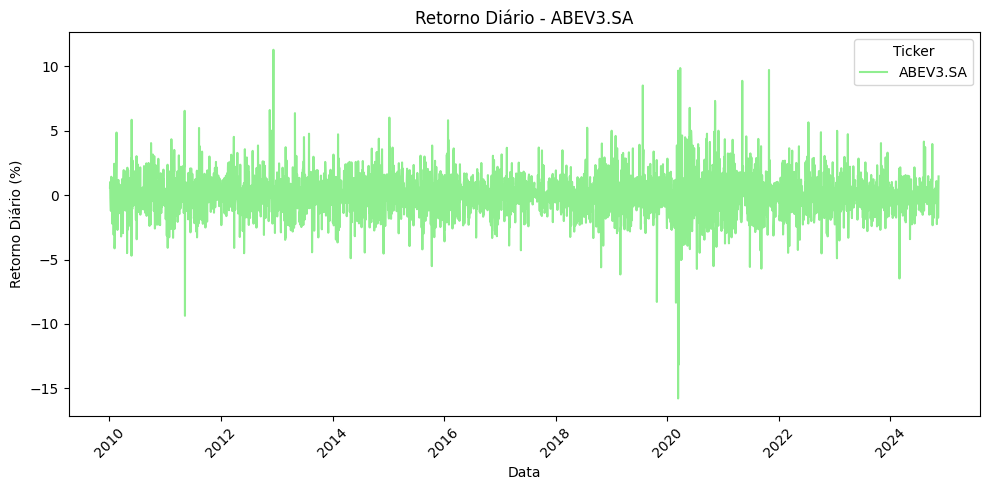

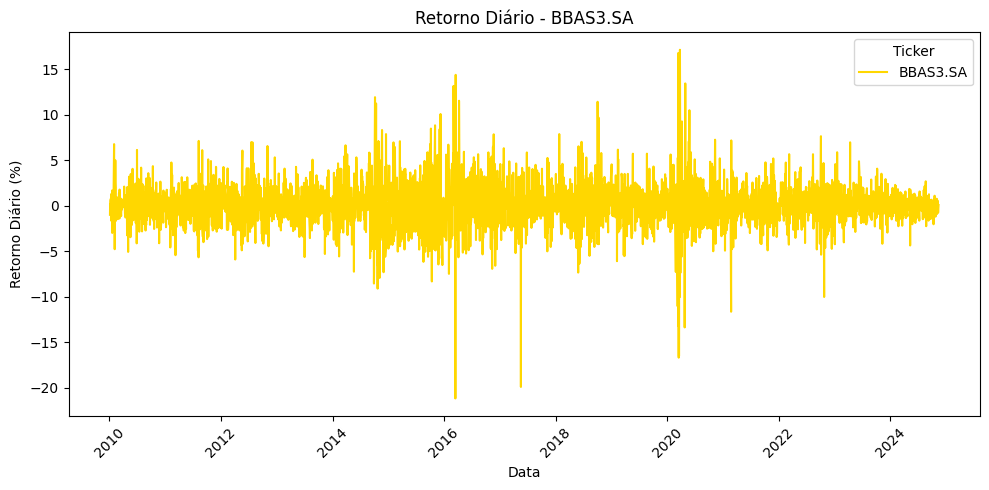

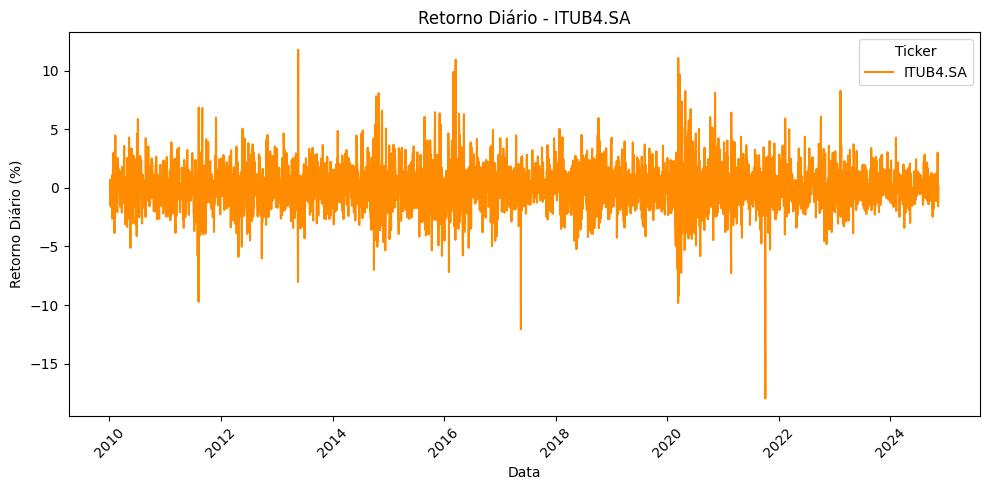

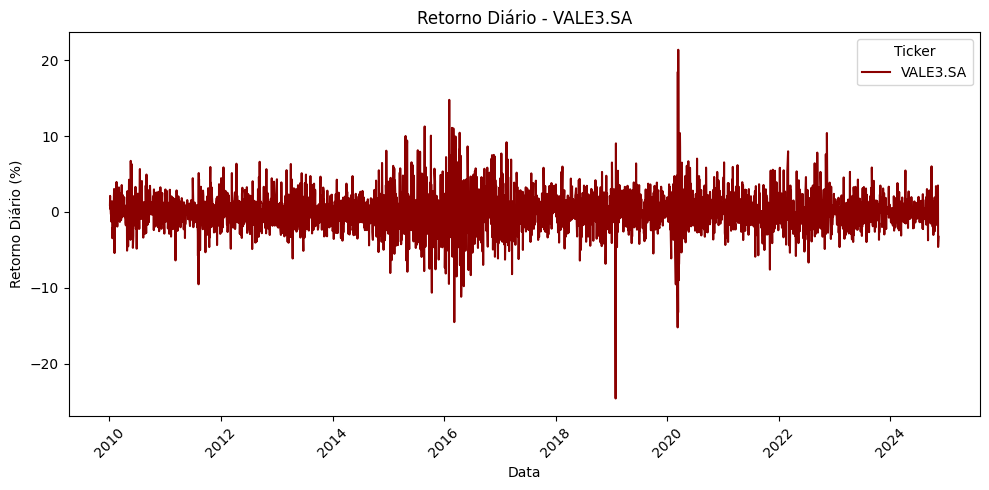

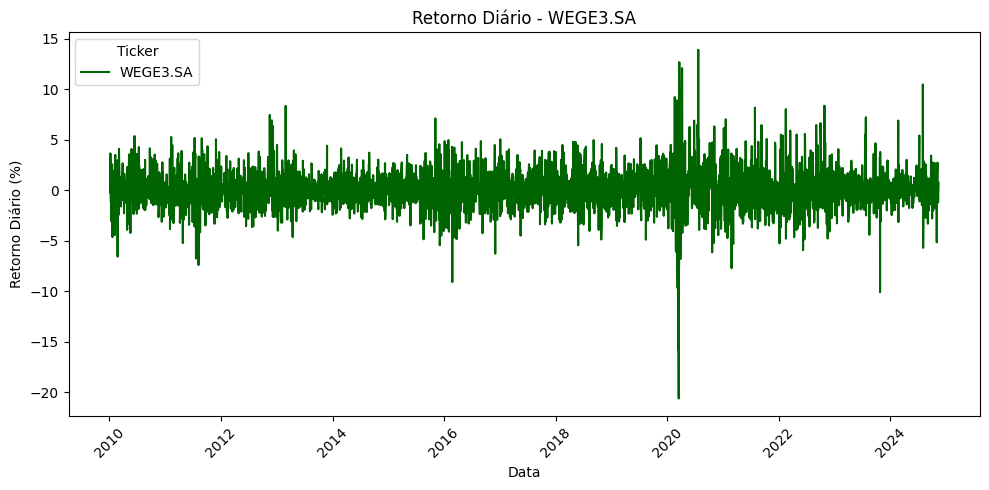

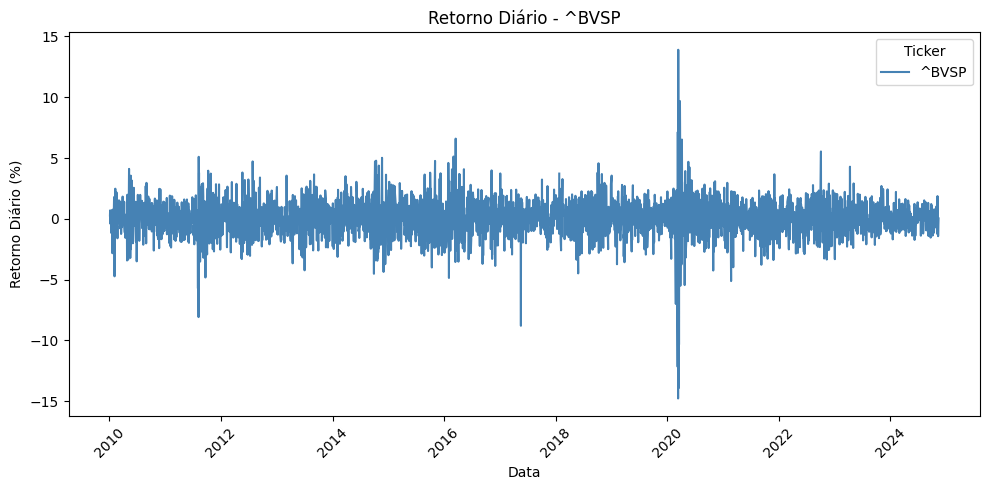

In [13]:
# Converte a coluna 'data' para o formato datetime, se necessário
dfHistoricoAcoesIndice['data'] = pd.to_datetime(dfHistoricoAcoesIndice['data'])

# Iterar por cada ticker, atribuindo uma cor específica
for i, (ticker, data) in enumerate(dfHistoricoAcoesIndice.groupby('ticker')):
    plt.figure(figsize=(10, 5))
    plt.plot(data['data'], data['Retorno Diário (%)'], label=ticker, color=color_map[ticker])
    
    # Personalizar o gráfico
    plt.title(f'Retorno Diário - {ticker}')
    plt.xlabel('Data')
    plt.ylabel('Retorno Diário (%)')
    plt.legend(title='Ticker')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Exibir o gráfico
    plt.show()


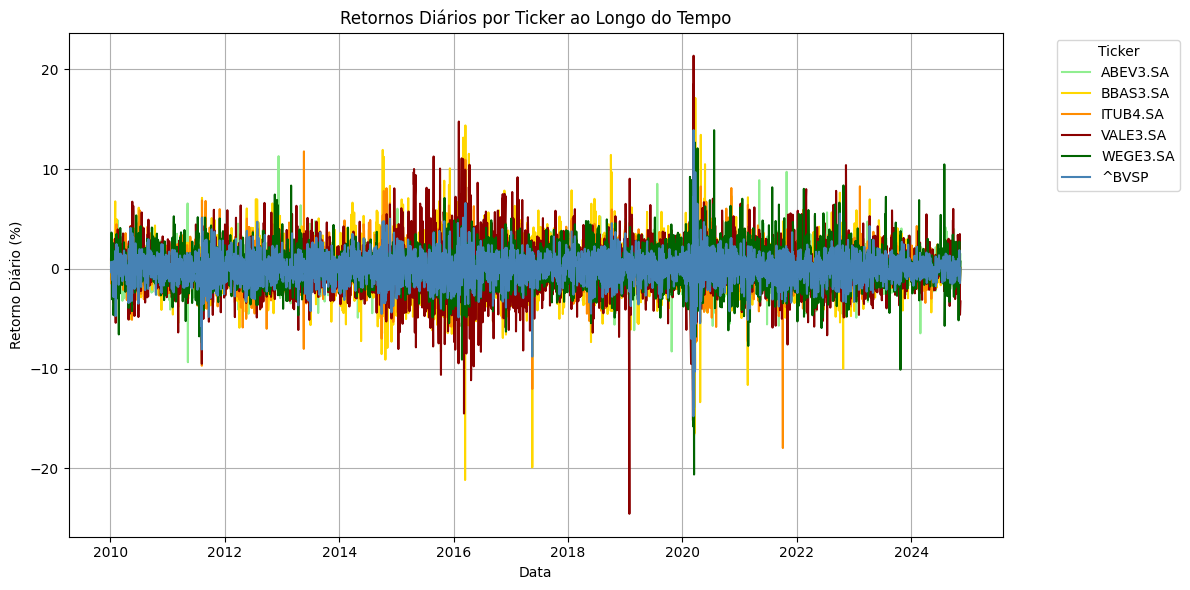

In [14]:
# Criar o gráfico
plt.figure(figsize=(12, 6))

# Plotar os retornos diários para cada ticker
for i, ticker in enumerate(tickers):
    data = dfHistoricoAcoesIndice[dfHistoricoAcoesIndice['ticker'] == ticker]
    plt.plot(data['data'], data['Retorno Diário (%)'], label=ticker, color=color_map[ticker])

# Configurar o gráfico
plt.title('Retornos Diários por Ticker ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Retorno Diário (%)')
plt.legend(title="Ticker", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Exibir o gráfico
plt.show()


---

### d) Monte um conjunto de carteiras simuladas da fronteira eficiente: 

Você deve simular um grande número de carteiras aleatórias que contenham as ações selecionadas e calcular o retorno e o risco de cada carteira. Você deve usar a **simulação Monte Carlo** para criar 50.000 carteiras simuladas e plotar a fronteira eficiente de Markowitz. Isso permitirá a você identificar a carteira com o melhor índice de Sharpe.

### e) Identifique a carteira com melhor índice de Sharpe

Você deve escolher a carteira com o melhor índice de Sharpe, que é uma medida de risco-retorno. Você deve plotar a carteira selecionada no gráfico das carteiras simuladas e destacar a **fronteira eficiente de Markowitz**. 


---

**Análise**

1. Apenas as 5 ações foram incluídas no cálculo, **desconsiderando o índice** (como ^BVSP).

2. O método de Monte Carlo é uma técnica probabilística que utiliza simulações aleatórias permitindo estimar resultados. Neste trabalho, são geradas várias carterias, com pesos diferentes das ações, para estimar o rendimento da carteira com base nos retornos diários das ações nos anos de 2010 a 2024. Assim é estimada a melhor composição da carteira com base no risco aceito e retorno estimados.

3. Foram realizadas **50.000 simulações de carteiras aleatórias**. Para cada carteira, foram calculadas as seguintes medidas:

    - **Peso das carteiras**: 
        - Representa a alocação percentual de cada ativo na carteira.
        - Os pesos foram gerados aleatoriamente utilizando a função `np.random`.
        - Cada peso foi normalizado dividindo o valor gerado para cada ativo pela soma total dos valores, resultando na proporção "percentual" de cada ativo na carteira para uma determinada simulação.

    - **Retorno das carteiras**: 
        - Representa o retorno anualizado esperado da carteira, calculado ponderando a **média dos retornos diários por ticker** pelos pesos gerados em **peso das carteiras**.
        - De acordo com a **teoria de Markowitz**, foi utilizada a **média dos retornos diários históricos** como uma estimativa do retorno esperado.

    - **Risco das carteiras**: 
        - Corresponde ao desvio padrão anualizado, que leva em consideração a **variância** e **covariância** dos retornos dos ativos.
        - O cálculo utiliza a covariância dos retornos diários dos ativos, ponderada pelos pesos calculados anteriormente, para obter o risco consolidado da carteira.

    - **Índice de Sharpe**: 
        - Mede a eficiência risco-retorno, sendo calculado como a razão entre o retorno excedente (acima da **taxa livre de risco**) e o risco.
        - Foi utilizada uma **taxa livre de risco** de **5% ao ano** no exemplo.
        - A carteira com o maior **Índice de Sharpe** é a **melhor carteira**.

4. **Sobre o gráfico gerado**:
    - Trata-se de um gráfico em **2 dimensões**, onde:
        - O eixo **X** representa o **risco (desvio padrão)**.
        - O eixo **Y** representa o **retorno esperado**.
    - Uma terceira informação, o **Índice de Sharpe**, foi adicionada ao gráfico por meio da utilização de uma paleta de cores (colormap) chamada **Viridis**.
        - O gradiente de cores permite a visualização do Índice de Sharpe:
            - **Roxo escuro**: Representa os menores valores do Índice de Sharpe.
            - **Azul e verde**: Valores intermediários.
            - **Amarelo claro**: Representa os maiores valores do Índice de Sharpe.
   -  O gráfico apresenta a **fronteira eficiente de Markowitz**
       - Esta fronteira apresenta as carteiras que maximizam o retorno esperado para um dado nível de risco ou minimizam o risco para um dado retorno esperado.
       - A parte inferior esquerda da curva representam carteiras com baixo risco e baixo retorno.
       - A parte superior esquerda apresentam as carteiras com maior risco e maior retorno.
    - A **melhor carteira**, maior índice sharpe, foi destacada no mapa com um **ponto vermelho**.


In [15]:
# Filtrar os tickers, excluindo o índice ^BVSP
tickersCarteira = [ticker for ticker in tickers if ticker != '^BVSP']

# Filtrar os dados de retorno diário, removendo o índice ^BVSP
retornos_diarios = dfHistoricoAcoesIndice.pivot(index='data', columns='ticker', values='Retorno Diário (%)')
retornos_diarios = retornos_diarios[tickersCarteira]  # Selecionar apenas os tickers restantes
retornos_diarios = retornos_diarios.dropna()

# Número de carteiras simuladas
num_carteiras = 50000

# Taxa livre de risco (por exemplo, 5% ao ano, ajustado para diário)
taxa_livre_risco = 0.05 / 252

# Listas para armazenar resultados
pesos_carteiras = []
retornos_carteiras = []
riscos_carteiras = []
sharpe_ratios = []

# Simulação de Monte Carlo
np.random.seed(42)
for _ in range(num_carteiras):
    # Gerar pesos aleatórios
    pesos = np.random.random(len(tickersCarteira))
    pesos /= np.sum(pesos)  # Normalizar para somar 1
    
    # Calcular retorno esperado e risco da carteira
    retorno_carteira = np.sum(pesos * retornos_diarios.mean()) * 252  # risco anual da carteira considerando o peso em análise
    risco_carteira = np.sqrt(np.dot(pesos.T, np.dot(retornos_diarios.cov() * 252, pesos)))  
    
    # Índice de Sharpe
    sharpe = (retorno_carteira - taxa_livre_risco) / risco_carteira
    
    # Armazenar resultados
    pesos_carteiras.append(pesos)
    retornos_carteiras.append(retorno_carteira)
    riscos_carteiras.append(risco_carteira)
    sharpe_ratios.append(sharpe)



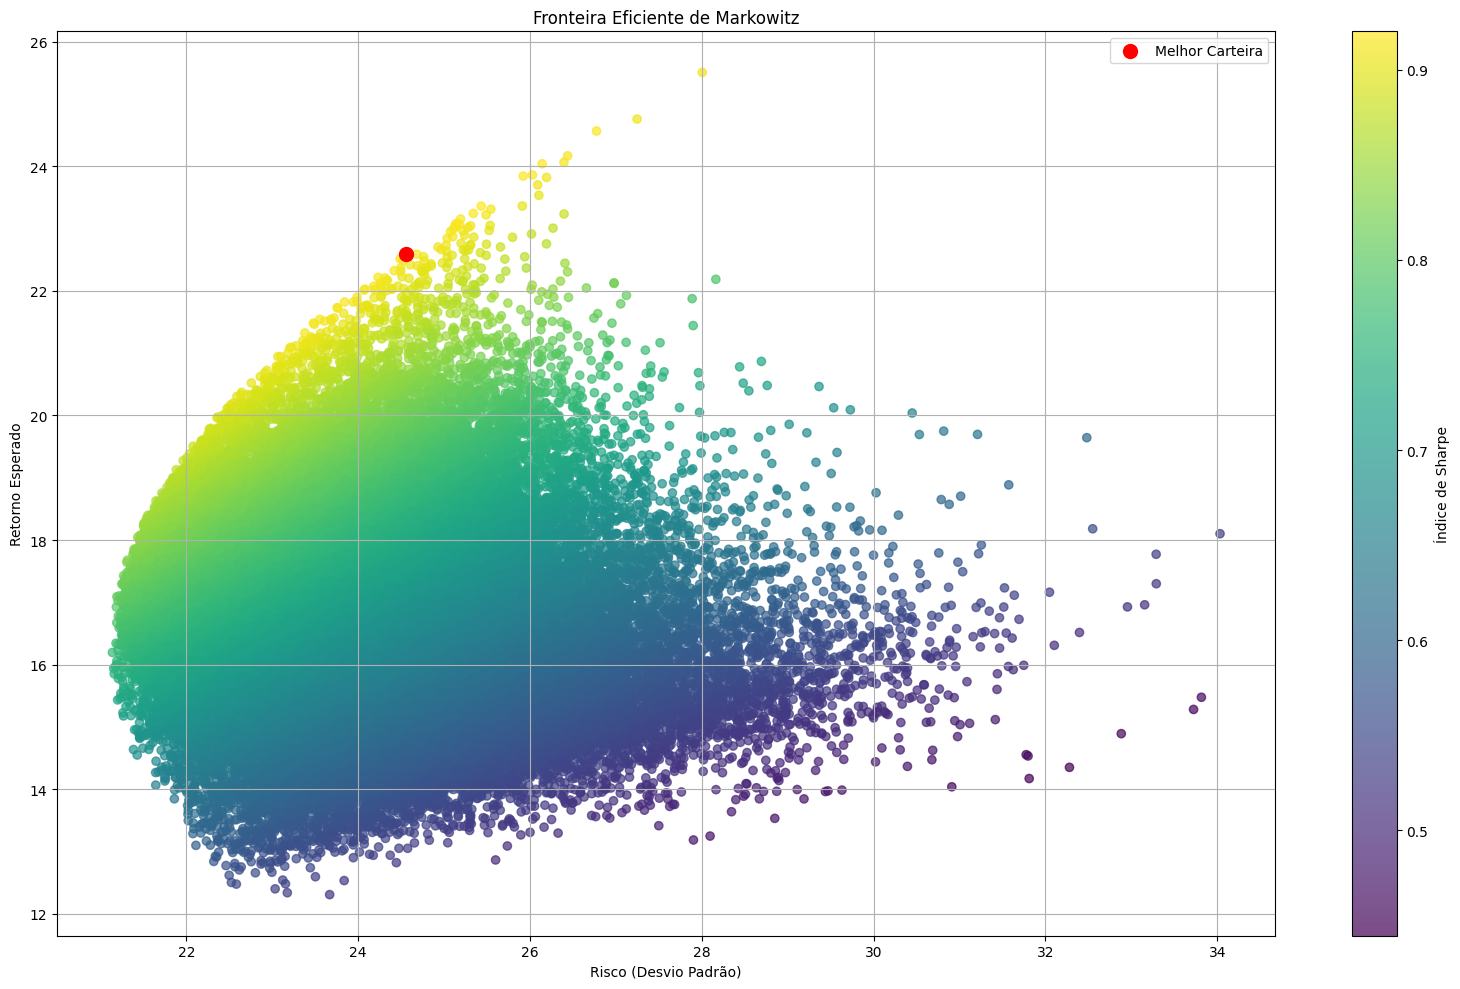

     Ticker      Peso
0  ABEV3.SA  0.145173
1  BBAS3.SA  0.110824
2  ITUB4.SA  0.036528
3  VALE3.SA  0.078258
4  WEGE3.SA  0.629217


In [16]:
# Converter resultados em DataFrame
carteiras_df = pd.DataFrame({
    'Retorno': retornos_carteiras,
    'Risco': riscos_carteiras,
    'Sharpe Ratio': sharpe_ratios
})

# Identificar a carteira com o maior índice de Sharpe
melhor_carteira_idx = np.argmax(carteiras_df['Sharpe Ratio'])
melhor_carteira = carteiras_df.iloc[melhor_carteira_idx]
melhor_pesos = pesos_carteiras[melhor_carteira_idx]

# Plotar a fronteira eficiente
plt.figure(figsize=(16, 10))
plt.scatter(carteiras_df['Risco'], carteiras_df['Retorno'], c=carteiras_df['Sharpe Ratio'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Índice de Sharpe')
plt.scatter(melhor_carteira['Risco'], melhor_carteira['Retorno'], c='red', s=100, label='Melhor Carteira')
plt.title('Fronteira Eficiente de Markowitz')
plt.xlabel('Risco (Desvio Padrão)')
plt.ylabel('Retorno Esperado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Exibir os pesos da melhor carteira
melhor_pesos_df = pd.DataFrame({'Ticker': tickersCarteira, 'Peso': melhor_pesos})
print(melhor_pesos_df)


### f) Ilustre a evolução de seu patrimônio

Você pode simular o desempenho da carteira selecionada ao longo do tempo e calcular o retorno esperado. Você deve então plotar a evolução do patrimônio com um investimento inicial de **R$35.000,00**.


---
**Análise**

- Para efeitos de estudo, foram calculados os desempenhos considerando a **melhor** e a **pior carteira**.
- A projeção foi realizada com base nos valores das ações obtidos a partir de **01/01/2010**, sendo, portanto, uma análise **retroativa**, baseada nos percentuais de desempenho das ações nas carteiras de melhor e pior performance.
- Observa-se uma **queda significativa antes de 2020** e, em seguida, um **forte crescimento**, especialmente na carteira de melhor desempenho, a partir de 2020.
---

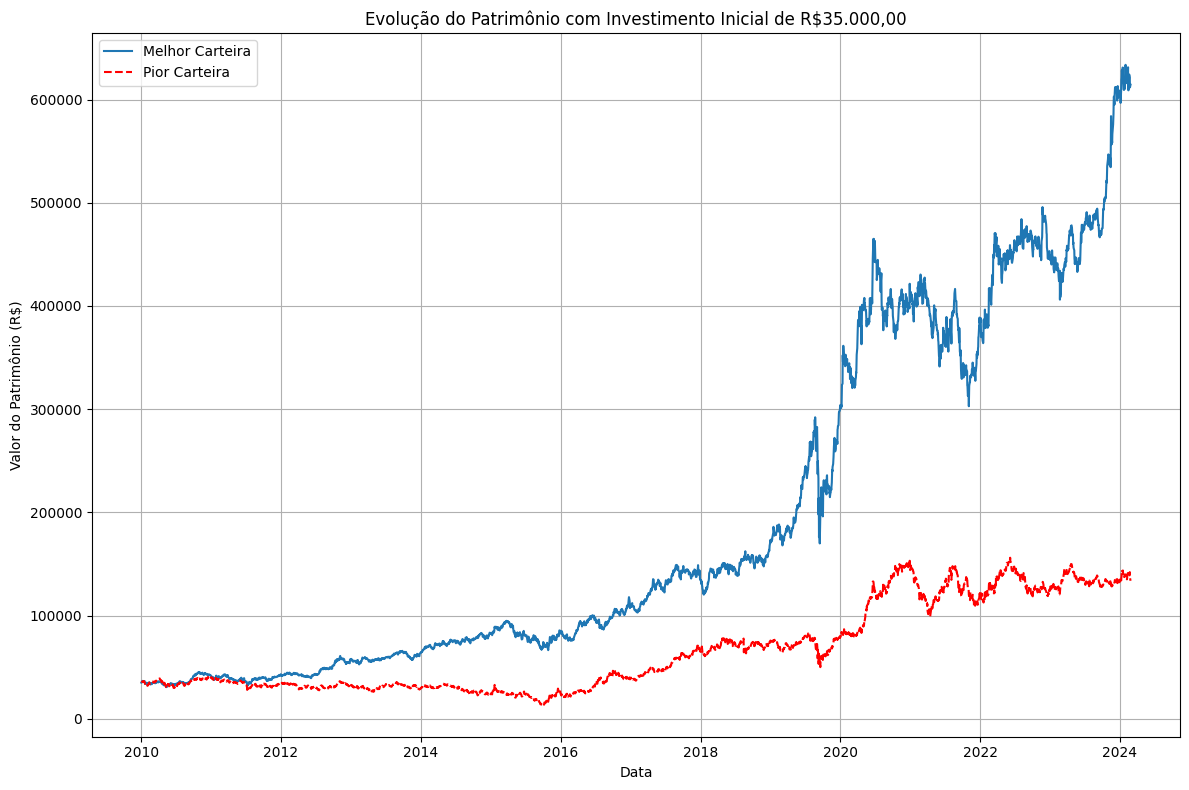

Valor final do patrimônio (Melhor Carteira) após 3692 dias úteis: R$614,443.25
Valor final do patrimônio (Pior Carteira) após 3692 dias úteis: R$133,652.10


In [17]:
# Identificar a carteira com o menor índice de Sharpe
pior_carteira_idx = np.argmin(carteiras_df['Sharpe Ratio'])
pior_carteira = carteiras_df.iloc[pior_carteira_idx]
pior_pesos = pesos_carteiras[pior_carteira_idx]

# Calcular os retornos diários das melhores e piores carteiras
retorno_diario_carteira_melhor = retornos_diarios @ melhor_pesos
retorno_diario_carteira_pior = retornos_diarios @ pior_pesos

# Parâmetros iniciais
investment_initial = 35000  # Investimento inicial em R$
num_days = len(retorno_diario_carteira_melhor)  # Número de dias simulados com base nos retornos diários

# Simulação da evolução do patrimônio (melhor carteira)
portfolio_values_melhor = [investment_initial]
for ret in retorno_diario_carteira_melhor:
    portfolio_values_melhor.append(portfolio_values_melhor[-1] * (1 + (ret / 100)))

# Simulação da evolução do patrimônio (pior carteira)
portfolio_values_pior = [investment_initial]
for ret in retorno_diario_carteira_pior:
    portfolio_values_pior.append(portfolio_values_pior[-1] * (1 + (ret / 100)))

# Criar um DataFrame para visualização
dates = pd.date_range(start="2010-01-01", periods=num_days, freq="B")  # Dias úteis
portfolio_df = pd.DataFrame({
    "Date": dates,
    "Melhor Carteira": portfolio_values_melhor[1:],  # Excluir o valor inicial para alinhar com as datas
    "Pior Carteira": portfolio_values_pior[1:]       # Excluir o valor inicial para alinhar com as datas
})

# Plotar a evolução do patrimônio
plt.figure(figsize=(12, 8))
plt.plot(portfolio_df["Date"], portfolio_df["Melhor Carteira"], label="Melhor Carteira")
plt.plot(portfolio_df["Date"], portfolio_df["Pior Carteira"], label="Pior Carteira", linestyle='--', color='red')
plt.title("Evolução do Patrimônio com Investimento Inicial de R$35.000,00")
plt.xlabel("Data")
plt.ylabel("Valor do Patrimônio (R$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular e exibir os resultados
final_value_melhor = portfolio_values_melhor[-1]
final_value_pior = portfolio_values_pior[-1]
print(f"Valor final do patrimônio (Melhor Carteira) após {num_days} dias úteis: R${final_value_melhor:,.2f}")
print(f"Valor final do patrimônio (Pior Carteira) após {num_days} dias úteis: R${final_value_pior:,.2f}")


### g) Monte a avaliação de risco da carteira

Você deve usar a simulação Monte Carlo para calcular o **Value at Risk (VaR)** da carteira selecionada, que é uma medida de risco que quantifica a **perda potencial** em uma carteira em um nível de confiança específico. 

Você deve calcular o **VaR para um nível de perda aceitável de retorno** e também para um **nível máximo de perda aceitável em valor em reais**.


---
**Análise**

- Na simulação de Monte Carlo, foram realizadas **100.000 simulações**.
- Os valores simulados (rendimentos diários) foram selecionados aleatoriamente a partir dos retornos da **melhor carteira**. A amostra original continha **3.692 registros**, dos quais foram extraídos 100.000 valores de forma **aleatória com reposição**.
- Para o cálculo do **Value at Risk (VaR)**, foram considerados **3 níveis de confiança**. Isso proporciona uma visão abrangente de diferentes cenários de perda. Observa-se que, quanto maior o nível de confiança, maior o valor estimado de perda potencial.
- A distribuição dos valores simulados (patrimônio) e dos retornos simulados apresenta características consistentes com uma **distribuição normal**, conforme evidenciado pelos gráficos.
- A análise considerou **5 limites de perda aceitável**, tanto em termos de **retorno percentual** quanto de **perda absoluta em reais**.
- As probabilidades de exceder os limites de perda diminuem proporcionalmente à redução dos próprios limites aceitáveis. Isso significa que limites de perda mais restritivos (mais negativos) apresentam menor probabilidade de serem excedidos, enquanto limites mais permissivos (menos negativos) são excedidos com maior frequência. 
    - Por exemplo, a probabilidade de o retorno ser inferior a -2% foi de 6,68%, enquanto a probabilidade de ser inferior a -10% foi de apenas 0,06%.

---


In [18]:
# Parâmetros iniciais
investment_initial = 35000  # Investimento inicial em R$
num_simulations = 100000  # Número de simulações
confidence_levels = [0.90, 0.95, 0.99]  # Lista com diferentes níveis de confiança
loss_threshold_returns = [-0.02, -0.03, -0.05, -0.07, -0.1]  # Lista com 5 valores de perda aceitável em termos de retorno
loss_threshold_values = [-500, -1000, -2000, -3000, -5000]  # Lista com valores aceitáveis de perda em reais

# Simular retornos baseados na distribuição dos retornos históricos da carteira
simulated_returns = np.random.choice(retorno_diario_carteira_melhor, size=num_simulations, replace=True) / 100

# Calcular os valores simulados do patrimônio
simulated_values = investment_initial * (1 + simulated_returns)

# Calcular o VaR para diferentes níveis de confiança
VaR_results = {}
for confidence_level in confidence_levels:
    VaR_return = np.percentile(simulated_returns, (1 - confidence_level) * 100)  # Percentil para nível de confiança
    VaR_value = investment_initial * VaR_return  # Perda potencial em valor (R$)
    VaR_results[confidence_level] = (VaR_return, VaR_value)

# Calcular a probabilidade de exceder os limites de perda aceitável para cada retorno
prob_losses_returns = {threshold: np.mean(simulated_returns <= threshold) for threshold in loss_threshold_returns}

# Calcular a probabilidade de exceder os limites de perda aceitável para cada valor absoluto
prob_losses_values = {
    threshold: np.mean(simulated_values <= (investment_initial + threshold)) for threshold in loss_threshold_values
}

# Exibir os resultados
print("**Value at Risk (VaR) para diferentes níveis de confiança:**")
for confidence_level, (VaR_return, VaR_value) in VaR_results.items():
    print(f"- Nível de Confiança {confidence_level:.0%}:")
    print(f"  - Perda potencial em retorno: {VaR_return:.2%}")
    print(f"  - Perda potencial em valor (R$): R${VaR_value:,.2f}")
print()

print("**Probabilidades de exceder os níveis de perda aceitável em retorno:**")
for threshold, prob in prob_losses_returns.items():
    print(f"- Retorno menor que {threshold:.2%}: {prob:.2%}")

print("\n**Probabilidades de exceder os níveis de perda aceitável em valor:**")
for threshold, prob in prob_losses_values.items():
    print(f"- Patrimônio abaixo de R${investment_initial + threshold:,.2f}: {prob:.2%}")


**Value at Risk (VaR) para diferentes níveis de confiança:**
- Nível de Confiança 90%:
  - Perda potencial em retorno: -1.63%
  - Perda potencial em valor (R$): R$-569.45
- Nível de Confiança 95%:
  - Perda potencial em retorno: -2.24%
  - Perda potencial em valor (R$): R$-785.22
- Nível de Confiança 99%:
  - Perda potencial em retorno: -3.78%
  - Perda potencial em valor (R$): R$-1,323.70

**Probabilidades de exceder os níveis de perda aceitável em retorno:**
- Retorno menor que -2.00%: 6.66%
- Retorno menor que -3.00%: 1.94%
- Retorno menor que -5.00%: 0.39%
- Retorno menor que -7.00%: 0.12%
- Retorno menor que -10.00%: 0.06%

**Probabilidades de exceder os níveis de perda aceitável em valor:**
- Patrimônio abaixo de R$34,500.00: 12.26%
- Patrimônio abaixo de R$34,000.00: 2.24%
- Patrimônio abaixo de R$33,000.00: 0.29%
- Patrimônio abaixo de R$32,000.00: 0.09%
- Patrimônio abaixo de R$30,000.00: 0.06%


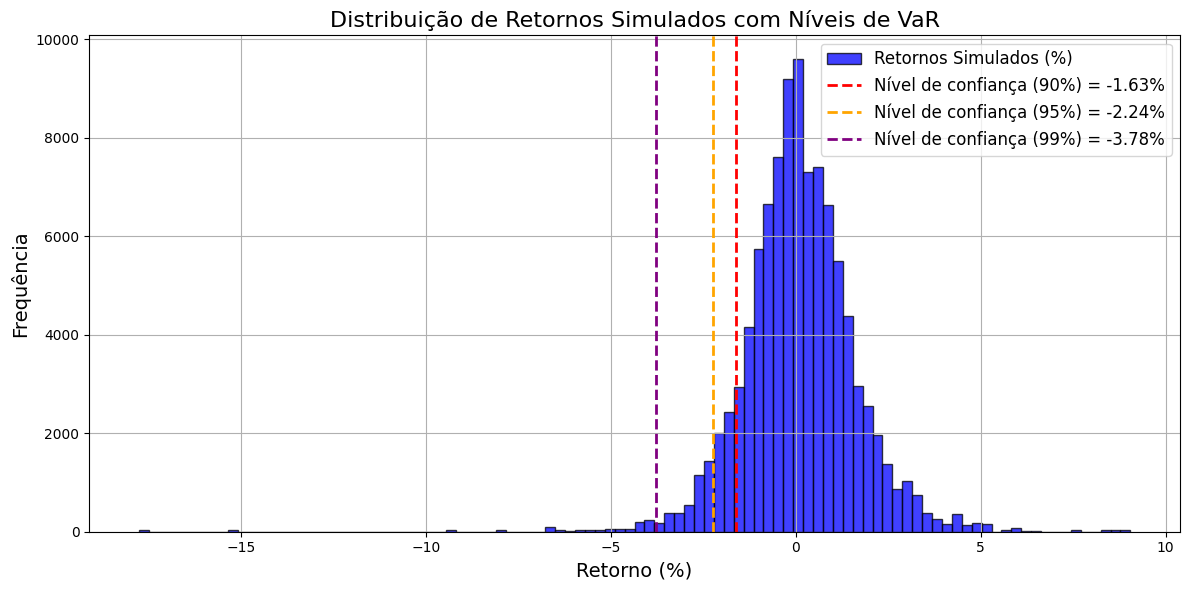

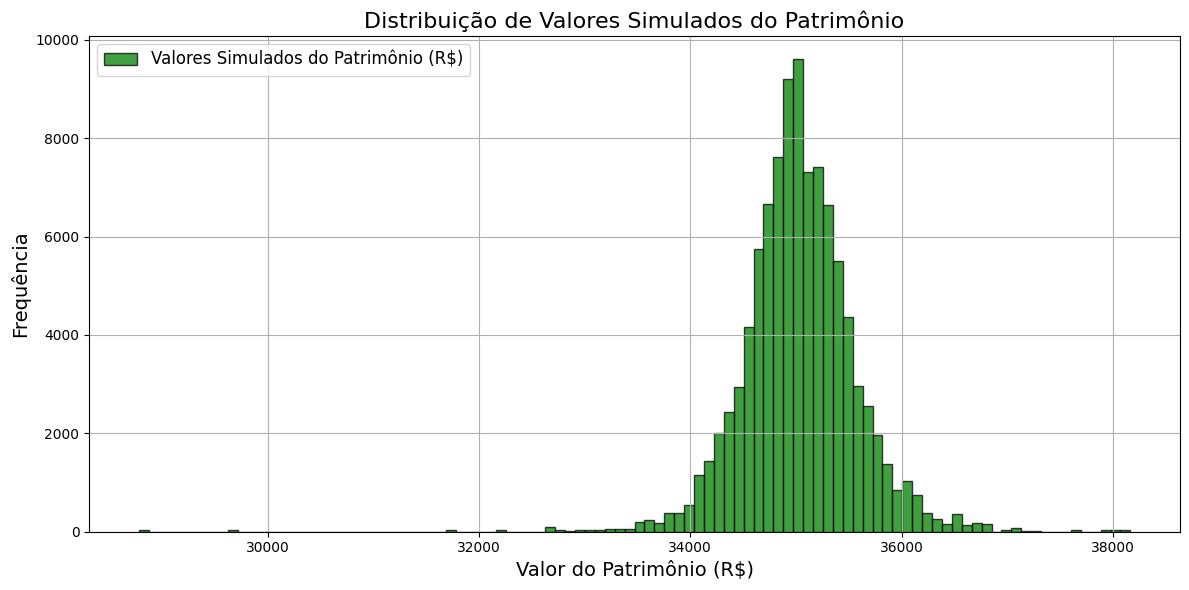

In [19]:
# Paleta de cores para diferentes níveis de confiança
colors = ['red', 'orange', 'purple']

# Gráfico 1: Distribuição de simulated_returns com linhas de VaR_return
plt.figure(figsize=(12, 6))
plt.hist(simulated_returns * 100, bins=100, alpha=0.75, color='blue', edgecolor='black', label="Retornos Simulados (%)")

# Adicionar linhas para os níveis de confiança de VaR_return com cores diferentes
for i, confidence_level in enumerate(confidence_levels):
    VaR_return = VaR_results[confidence_level][0]
    plt.axvline(VaR_return * 100, color=colors[i % len(colors)], linestyle='--', linewidth=2,
                label=f'Nível de confiança ({confidence_level:.0%}) = {VaR_return * 100:.2f}%')

# Configurações do gráfico
plt.title('Distribuição de Retornos Simulados com Níveis de VaR', fontsize=16)
plt.xlabel('Retorno (%)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico 2: Distribuição de simulated_values
plt.figure(figsize=(12, 6))
plt.hist(simulated_values, bins=100, alpha=0.75, color='green', edgecolor='black', label="Valores Simulados do Patrimônio (R$)")
plt.title('Distribuição de Valores Simulados do Patrimônio', fontsize=16)
plt.xlabel('Valor do Patrimônio (R$)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
